# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


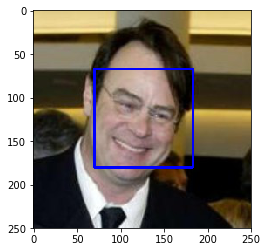

In [26]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [28]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [6]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
no_of_faces_in_human = 0
no_of_faces_in_dog = 0

for ii in range(100):
    if face_detector(human_files_short[ii]):
        no_of_faces_in_human += 1
    if face_detector(dog_files_short[ii]):
        no_of_faces_in_dog +=1
        
print (f"Percentage of Detected human faces: {no_of_faces_in_human}%")
print (f"Percentage of Detected dog faces: {no_of_faces_in_dog}%")

Percentage of Detected human faces: 98%
Percentage of Detected dog faces: 17%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [2]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
# if use_cuda:
#     VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 102941886.01it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [3]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    # Load and pre-process an image from the given img_path
    img = Image.open(img_path)

    # VGG-16 takes 224x224 images as input, resize! Reized image using randoresizeCrop to size 224X224 
    # Convert PIL image into Tersor
    # Normailize input images to make its elements from 0 to 1
    data_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                        std=[0.229, 0.224, 0.225])])

    # PyTorch pretrained models expect the Tensor dims to be (num input imgs, num color channels, height, width).
    # Currently however, we have (num color channels, height, width); let's fix this by inserting a new axis. 
    # Insert the new axis at index 0 i.e. in front of the other axes/dims.
    img = data_transform(img)

    # Returns a new tensor with a dimension of size one inserted at the specified position(0 here)
    img = img.unsqueeze(0)

    prediction = VGG16(img)
    prediction = prediction.data.numpy().argmax()
    
    ## Return the *index* of the predicted class for that image    
    return prediction # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [4]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function
    predicted = VGG16_predict(img_path)
    dog_predicted = False
    if((predicted >= 151) & (predicted <=268)):
        dog_predicted =  True
    
    return dog_predicted # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [9]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
num_of_human_detected = 0.0
num_of_dog_detected = 0.0

print('VGG-16 Prediction')

num_files = len(human_files_short)

for i in range(0, num_files):
    human_path = human_files_short[i]
    dog_path = dog_files_short[i]
    
    if dog_detector(human_path) == True:
        num_of_human_detected += 1
    if dog_detector(dog_path) == True:
        num_of_dog_detected += 1


print('The percentage of the detected dog - Humans: {0:.0%}'.format(num_of_human_detected / num_files))
print('The percentage of the detected dog - Dogs: {0:.0%}'.format(num_of_dog_detected / num_files))



VGG-16 Prediction
The percentage of the detected dog - Humans: 2%
The percentage of the detected dog - Dogs: 99%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [13]:
import os
from torchvision import datasets
from torchvision import utils
import torchvision.transforms as transforms
from PIL import ImageFile


ImageFile.LOAD_TRUNCATED_IMAGES = True
%matplotlib inline

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# Resize images because the input image to 224x224
# Convert to Tensor
# Normalize images because the values of images should be loaded between [0 - 1]
transforms = {
    
    # Use RandomHorizontalFlip() to augement data in the train transformation
    'train' : transforms.Compose([
                                transforms.Resize(256),
                                transforms.RandomResizedCrop(224),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])
                                ]),
    
    'valid' : transforms.Compose([
                                transforms.Resize(256),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])
                                ]),
    
    'test' : transforms.Compose([
                                transforms.Resize(256),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])
                                ])
}



# Check if CUDA is available
use_cuda = torch.cuda.is_available()
print('CUDA :', use_cuda)


# define the datasets

# Create image datasets (train, valid, test)
image_datasets = {x: datasets.ImageFolder(os.path.join('/data/dog_images/', x), transforms[x])
                 for x in ['train', 'valid', 'test']}


# define the dataloaders

# Number of subprocesses, if it's 0, it is basically the main process.
num_workers = 0
# How many samples will be loaded per batch?
batch_size = 20

# Create data loaders (train, valid, test)
data_loaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                              shuffle=True, num_workers=num_workers)
               for x in ['train', 'valid', 'test']}

# # Decrease batch size because of the out of memory in the GPU Instance
# test_loader = torch.utils.data.DataLoader(image_datasets['test'], shuffle=True,
#                                          batch_size=15)

# Check the dataset sizes
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid', 'test']}

print('Number of records of training dataset: {}'.format(dataset_sizes['train']))
print('Number of records of validation dataset: {}'.format(dataset_sizes['valid']))
print('Number of records of test dataset: {}'.format(dataset_sizes['test']))

CUDA : True
Number of records of training dataset: 6680
Number of records of validation dataset: 835
Number of records of test dataset: 836


In [5]:
train_classes = image_datasets['train'].classes
print(len(train_classes))

133


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

**How does your code resize the images (by cropping, stretching, etc)? What size did you pick for the input tensor, and why**

While implementing my own model architecture, i have imitate the VGG-16 model.

1) **For train dataset** : a) first resizing the image to 256x256 
                       b) Next the image is being cropped off random size of the original size and then resized to 224X224.
                          This is  done as VGG16 takes an input image of size 224X224
                          
2) **For test & validation dataset** : a) first resizing the image to 256x256 
                                   b) Next the image is being cropping off at the center position and extracting a 224x224                                           sized image.This is done as VGG16 takes an input image of size 224X224.     
                                   
                                   
                                   
**Did you decide to augment the dataset? If so, how (through translations, flips, rotations, etc)? If not, why not?**                
I've augmented the dataset by RandomResizedCrop() and RandomHorizontalFlip(). Data augmentation is done to make the Neural Network learn the irrelevant patterns of the data and which in turn helps in improving performance by reducing the risk of overfitting.                    

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [19]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Classifier(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Classifier, self).__init__()
        
        ## Following the architecture of VGG-16 model
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.conv3 = nn.Conv2d(32, 64, 3)
        self.conv4 = nn.Conv2d(64, 128, 3)
        self.conv5 = nn.Conv2d(128, 256, 3)
        
        self.max_pool = nn.MaxPool2d(2, 2,ceil_mode=True)
        self.fc1 = nn.Linear(256 * 6 * 6, 133)
        
        
        self.dropout = nn.Dropout(0.25)
    
        self.bn1 = nn.BatchNorm2d(16)
        self.bn2 = nn.BatchNorm2d(32)
        self.bn3 = nn.BatchNorm2d(64)
        self.bn4 = nn.BatchNorm2d(128)
        self.bn5 = nn.BatchNorm2d(256)
        

    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))
        x = self.max_pool(x)
        x = self.bn1(x)

        x = F.relu(self.conv2(x))
        x = self.max_pool(x)
        x = self.bn2(x)

        x = F.relu(self.conv3(x))
        x = self.max_pool(x)
        x = self.bn3(x)

        x = F.relu(self.conv4(x))
        x = self.max_pool(x)
        x = self.bn4(x)

        x = F.relu(self.conv5(x))
        x = self.max_pool(x)
        x = self.bn5(x)

        x = x.view(-1, 256 * 6 * 6)

        x = self.dropout(x)
        x = self.fc1(x)
        return x

# instantiate the CNN
model_scratch = Classifier()

print(model_scratch)
# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Classifier(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
  (fc1): Linear(in_features=9216, out_features=133, bias=True)
  (dropout): Dropout(p=0.25)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

The idea behind my architecture is based on the following key aspects:

**Convolutional Layers** - A stack of filters whose parameters need to be tuned.

**Maxpooling layers** - Idea is to downsample the image while keeping only the most active pixels from the previous layers.

**Linear + Dropout layers** -  This is done in order to avoid overfitting and produce a 133-dim output since we have 133 different classes to be classified.

**Batch Normalization** - Since we are computing the mean and standard deviation from a single batch as opposed to computing it from the entire data. Batch normalization is done individually at each hidden neuron in the network. Batch normalization adds two trainable parameters to each layer, so the normalized output is multiplied by a “standard deviation” parameter (gamma) and add a “mean” parameter (beta).

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [20]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr = 0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [14]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            ## Since the backward() function accumulates gradients, hence zeroed them out at the start of a new eatch batch.
            optimizer.zero_grad()
            # forward pass
            output = model(data)
            
            ## find the loss and update the model parameters accordingly
            loss = criterion(output, target)
            
            # backward pass
            loss.backward()
            
            # tune the model parameters
            optimizer.step()
            
            # update training loss
            # train_loss += loss.item()*data.size(0)
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            
            # update average validation loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss  
                
    # return trained model
    return model


# train the model
model_scratch = train(100, data_loaders, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 4.672137 	Validation Loss: 4.385423
Validation loss decreased (inf --> 4.385423).  Saving model ...
Epoch: 2 	Training Loss: 4.441915 	Validation Loss: 4.222555
Validation loss decreased (4.385423 --> 4.222555).  Saving model ...
Epoch: 3 	Training Loss: 4.288962 	Validation Loss: 4.116069
Validation loss decreased (4.222555 --> 4.116069).  Saving model ...
Epoch: 4 	Training Loss: 4.164364 	Validation Loss: 4.036190
Validation loss decreased (4.116069 --> 4.036190).  Saving model ...
Epoch: 5 	Training Loss: 4.065072 	Validation Loss: 3.911792
Validation loss decreased (4.036190 --> 3.911792).  Saving model ...
Epoch: 6 	Training Loss: 3.975091 	Validation Loss: 3.802368
Validation loss decreased (3.911792 --> 3.802368).  Saving model ...
Epoch: 7 	Training Loss: 3.867138 	Validation Loss: 3.728678
Validation loss decreased (3.802368 --> 3.728678).  Saving model ...
Epoch: 8 	Training Loss: 3.825736 	Validation Loss: 3.694742
Validation loss decreased (3.72867

In [15]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [10]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [16]:
# call test function    
test(data_loaders, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.458872


Test Accuracy: 42% (359/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [15]:
## TODO: Specify data loaders
loaders_transfer = data_loaders
print(loaders_transfer)

{'train': <torch.utils.data.dataloader.DataLoader object at 0x7fdde7781710>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x7fdde7781940>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x7fdde77819b0>}


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [6]:
import torchvision.models as models
import torch.nn as nn

## Specifying model architecture 
model_transfer = models.vgg16(pretrained=True)

# Freeze the pre-trained weights since we only need to traing the last fully connected layers.
for param in model_transfer.features.parameters():
    param.requires_grad = False
    
# Replace the last fully connected layer with a Linear layer with 133 out features
# The new layer's requires_grad will be automatically True.
# Get the input of the last layer of VGG-16
n_inputs = model_transfer.classifier[6].in_features
n_outputs = 133
last_fc = nn.Linear(n_inputs, n_outputs)

# Change the last layer to the new layer.
model_transfer.classifier[6] = last_fc

# Print the model.
print(model_transfer)

if use_cuda:
    model_transfer = model_transfer.cuda()


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

For dog breed classifier, I have used the pre-trained network(vgg16), since the vgg16 model is already trained on large and similar imagenet dataset.

For this classification problem, i have used transfer learning approach and since we need 133 classes as outputs, hence i have only changed last fully connected layer of the vgg16 model. Model parameter has been freezed and only the parameter of the fuly connected layer has been tuned during training process.

CrossEntropyLoss is being used as the criterion and to ensure the network parameters of the fully connected layers/classifier to change via backprop, model_transfer.classifier.parameters() is added.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [13]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            ## Since the backward() function accumulates gradients, hence zeroed them out at the start of a new eatch batch.
            optimizer.zero_grad()
            # forward pass
            output = model(data)
            
            ## find the loss and update the model parameters accordingly
            loss = criterion(output, target)
            
            # backward pass
            loss.backward()
            
            # tune the model parameters
            optimizer.step()
            
            # update training loss
            # train_loss += loss.item()*data.size(0)
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            
            # update average validation loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss  
                
    # return trained model
    return model

In [21]:
import torch.optim as optim
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [22]:
# train the model
n_epochs = 15
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch: 1 	Training Loss: 0.753248 	Validation Loss: 0.317535
Validation loss decreased (inf --> 0.317535).  Saving model ...
Epoch: 2 	Training Loss: 0.745110 	Validation Loss: 0.321637
Epoch: 3 	Training Loss: 0.727119 	Validation Loss: 0.313943
Validation loss decreased (0.317535 --> 0.313943).  Saving model ...
Epoch: 4 	Training Loss: 0.722582 	Validation Loss: 0.318169
Epoch: 5 	Training Loss: 0.701175 	Validation Loss: 0.315966
Epoch: 6 	Training Loss: 0.701119 	Validation Loss: 0.319436
Epoch: 7 	Training Loss: 0.682222 	Validation Loss: 0.318102
Epoch: 8 	Training Loss: 0.720274 	Validation Loss: 0.329040
Epoch: 9 	Training Loss: 0.715484 	Validation Loss: 0.316792
Epoch: 10 	Training Loss: 0.693508 	Validation Loss: 0.315939
Epoch: 11 	Training Loss: 0.687717 	Validation Loss: 0.311598
Validation loss decreased (0.313943 --> 0.311598).  Saving model ...
Epoch: 12 	Training Loss: 0.702872 	Validation Loss: 0.316736
Epoch: 13 	Training Loss: 0.697667 	Validation Loss: 0.307747
V

In [8]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [22]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.381252


Test Accuracy: 88% (741/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [23]:
### Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
import torchvision.transforms as transforms

data_transfer = image_datasets
resize_image_size = 224

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]


def predict_breed_transfer(img_path):
    
    # load the image and return the predicted breed
    image = Image.open(img_path).convert('RGB')
    
    #define the transform
    prediction_transform = transforms.Compose([
                                     transforms.Resize(size=(resize_image_size, resize_image_size)),
                                     transforms.ToTensor(), 
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = prediction_transform(image)[:3,:,:].unsqueeze(0)
    
    # move the image to cuda if availble
    if use_cuda:
        image = image.cuda()
    
    # move the model to evaluaion mode 
    model_transfer.eval()
    
    # find the prediction by the model
    idx = torch.argmax(model_transfer(image))
    return class_names[idx]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [24]:
from PIL import Image

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    image = Image.open(img_path)
    plt.imshow(image)
    
    
    if dog_detector(img_path) is True:
        prediction = predict_breed_transfer(img_path)
        print("Hey, doggy")
        plt.show()
        print("You look like you belong to the breed ...{0}".format(prediction))  
        
    elif face_detector(img_path) > 0:
        prediction = predict_breed_transfer(img_path)
        print("Hey, human")
        plt.show()
        print("You look like a ...{0}".format(prediction))
    else:
        
        print("Oops!! Neither Human nor Dog")
        plt.show()  


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

Some possible points of improvement -

1. Compare the model performance with other pre-trained network(like Resnet, Inception-v3 etc).
2. May be model could be generalized more by introducing some data augmentation mechanism.
3. Modify diff parameters like learning rate, no of epochs, optimizer and then comparing the model performance against this model.
4. Need to modularize the code.
5. Try with images where there are multiple human/dog images in a single image.

Hey, human


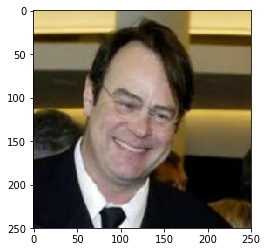

You look like a ...Welsh springer spaniel
Hey, human


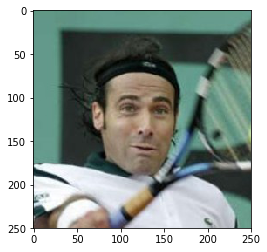

You look like a ...Dachshund
Hey, human


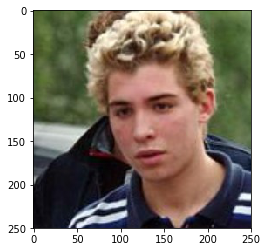

You look like a ...Portuguese water dog
Hey, doggy


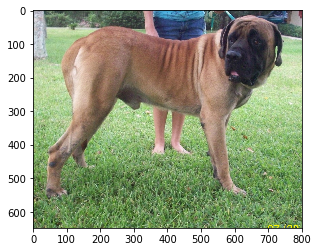

You look like you belong to the breed ...Bullmastiff
Hey, doggy


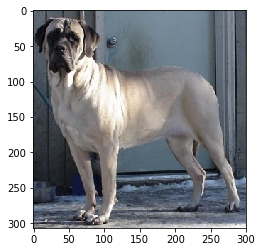

You look like you belong to the breed ...Mastiff
Hey, doggy


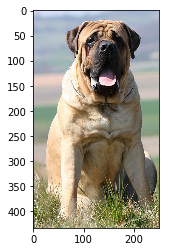

You look like you belong to the breed ...Bullmastiff


In [30]:
## Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

# Test the model performance against few more test images

In [37]:
# Load custom test images
human_test_files = np.array(glob("./test_images/human/*"))
dog_test_files = np.array(glob("./test_images/dog/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_test_files))
print('There are %d total dog images.' % len(dog_test_files))

There are 3 total human images.
There are 5 total dog images.


Hey, human


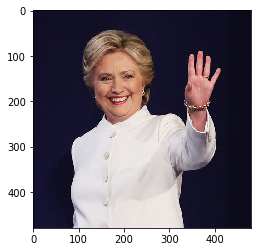

You look like a ...Pointer
Hey, human


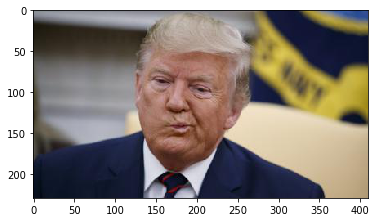

You look like a ...Pharaoh hound
Hey, human


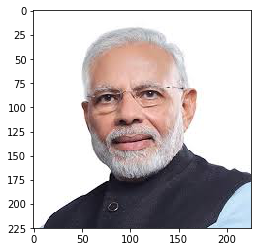

You look like a ...Labrador retriever
Hey, doggy


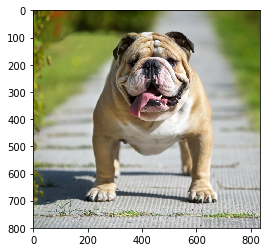

You look like you belong to the breed ...Bulldog
Hey, doggy


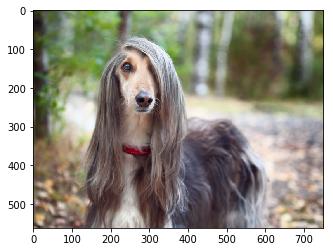

You look like you belong to the breed ...Afghan hound
Hey, doggy


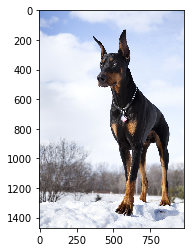

You look like you belong to the breed ...Manchester terrier
Hey, doggy


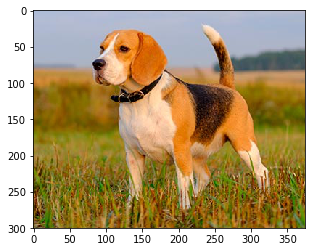

You look like you belong to the breed ...Beagle
Hey, doggy


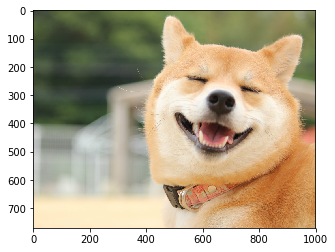

You look like you belong to the breed ...Finnish spitz


In [38]:
## suggested code, below
for file in np.hstack((human_test_files, dog_test_files)):
    run_app(file)